
# Kernel Density Estimation


This example shows how kernel density estimation (KDE), a powerful
non-parametric density estimation technique, can be used to learn
a generative model for a dataset.  With this generative model in place,
new samples can be drawn.  These new samples reflect the underlying model
of the data.



In [37]:
def plot_digits(data):
    fig, ax = plt.subplots(6,8, figsize=(4, 4),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)


In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# load the data
digits = load_digits()

# project the 64-dimensional data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params, cv=5)
grid.fit(data)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

# sample 44 new points from the data
new_data = kde.sample(48, random_state=0)
new_data = pca.inverse_transform(new_data)

# turn data into a 4x11 grid

best bandwidth: 3.79269019073225


/home/dhawal/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


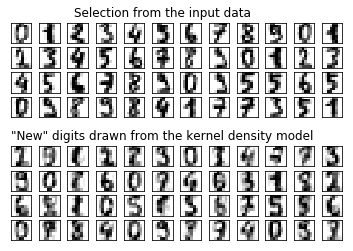

In [57]:
new_data = new_data.reshape((4, 12, -1))
real_data = digits.data[:48].reshape((4, 12, -1))

# plot real digits and resampled digits
fig, ax = plt.subplots(9, 12, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(12):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Selection from the input data')
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

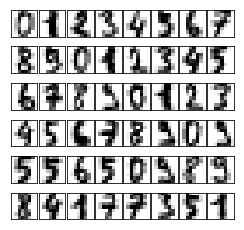

In [40]:
plot_digits(real_data)
# plot_digits(new_data)

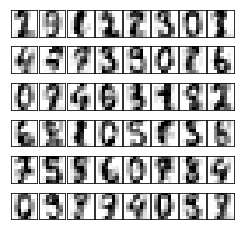

In [41]:
plot_digits(new_data)

In [42]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

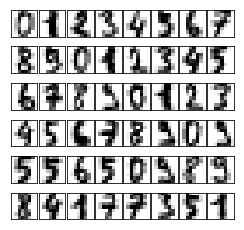

In [47]:
plot_digits(digits.data)

In [48]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

In [49]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

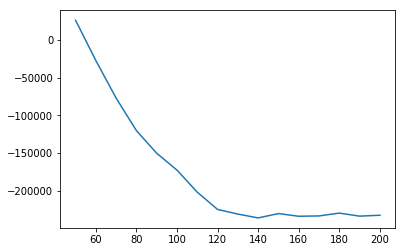

In [50]:
from sklearn import mixture
n_components = np.arange(50, 210, 10)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

In [51]:
from sklearn import mixture
gmm = mixture.GaussianMixture(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [52]:
# data_new = gmm.sample(48, random_state=7)
# data_new.shape

Xnew, _ = gmm.sample(48)  # if Ynew isn't valuable
# plt.scatter(Xnew[:, 0], Xnew[:, 1])

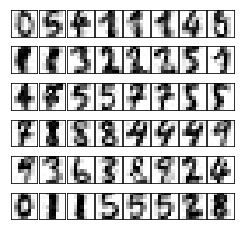

In [54]:
digits_new = pca.inverse_transform(Xnew)
plot_digits(digits_new)